# Les 8 - standaarddeviatie, bernoulli en binomiale verdeling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Standaarddeviatie discrete stochast

Gegeven is de stochast X met een discrete kansverdeling. Om de *sample mean* en *sample standaarddeviatie* te berekenen doe je het volgende:
Gebruik een simulatie om een $n$ aantal waarden van X te bepalen. Vervolgens geldt:
De sample mean $E(X) = \frac{X_1 + X_2 + \cdots X_n}{n}$ en de *sample standaarddeviatie* is:
$s(X) = \sqrt{\frac{((X_1 - E(X)^2 + \cdots (X_n - E(X)^2))}{n-1}}$

Als de kansverdeling bekend is kun je de mean en de standaarddeviatie berekenen met de volgende formules:
$E(X) = p_1\cdot X_1 + \cdot p_n\cdot X_n$ waar $X_1, \ldots X_n$ alle mogelijke waarde voor $X$ zijn.

De standaarddeviatie is dan:
$\sigma(X) = \sqrt{p_1(X_1-E(X))^2 + \cdots + p_n(X_n - E(X))^2}$

Voorbeeld, gooien met een dobbelsteen.

In [2]:
sample = np.random.randint(1,7, 10000)

In [3]:
sample_mean = np.sum(sample)/len(sample)
sample_mean

3.5183

In [4]:
np.sqrt(sum((sample - sample_mean)**2)/(len(sample)-1))

1.7141642120562595

In [5]:
np.sqrt(np.sum(1/6*(np.arange(1,7) - 3.5)**2))

1.707825127659933

Nu jullie met math oefenopdracht - sd discrete verdeling

In [6]:
points = np.array([0,25,50,100])
probs = np.array([0.5,0.25,0.17,0.08])

In [7]:
sample = np.random.choice(points, p = probs, size = 1000)

In [8]:
sample_mean = np.mean(sample)
sample_mean

22.2

In [9]:
#expected value
ev = np.sum(points*probs)

In [10]:
#sample sd
np.sqrt(np.sum((sample-sample_mean)**2)/(len(sample)-1))

28.003467538756592

In [11]:
#real sd
np.sqrt(np.sum(((points - ev)**2)*probs))

29.38856069970083

## Standaarddeviatie continue stochast

Voor een continue stochast met kansdischtheidsfunctie $p(x)$ geldt:
$$E(X) = \int_{-\infty}^{\infty} x\cdot p(x) dx$$
en het kwadraat van de standaarddeviatie vind je door:
$$\sigma^2(X) = \int_{-\infty}^{\infty} p(x)(x-E(X))^2 dx$$

Voorbeeld met de lengte van europeanen:

$$p(x) = \frac{1}{62.66} \cdot e^{-\frac{1}{2}(\frac{x-175}{25})^2}$$

In [12]:
# sd continue stochast a
from typing import Callable

def get_integral_between(func: Callable[[float], float], x1: float, x2: float, delta: float = 0.001) -> float:
    x = x1
    integral = 0
    while x < x2:
        integral += (func(x) + func(x + delta)) / 2 * delta
        x += delta
    return integral

In [13]:
def p_length(x):
    return 1/62.66 * np.exp(-1/2 * ((x-175)/25)**2)

In [14]:
def expected_value_length(x):
    return x*p_length(x)

In [15]:
ev_length = get_integral_between(expected_value_length, 50 , 300)
ev_length

175.01583810163595

In [16]:
#let op, we gebruiken in deze functie de evp uit de global namespaces. Dit is niet netjes, maar sneller dan wanneer we opnieuw in deze functie de verwachtingswaarde moeten uitrekenen.
def std_length(x):
    return p_length(x) * (x - ev_length)**2

In [17]:
sd = get_integral_between(std_length, 50, 300)

In [18]:
np.sqrt(sd)

25.000950452711432

Nu voor de oefenopdracht continue stochast:

In [19]:
def p_rain(x):
    return x * np.exp(-x)

In [20]:
def expected_value_rain(x):
    return x * p_rain(x)

In [21]:
ev_rain = get_integral_between(expected_value_rain, 0, 20)
ev_rain

1.9999990889700587

In [22]:
def var_rain(x):
    return p_rain(x) * (x-ev_rain)**2

In [23]:
var = get_integral_between(var_rain, 0, 20)

In [24]:
np.sqrt(var)

1.414207875571789

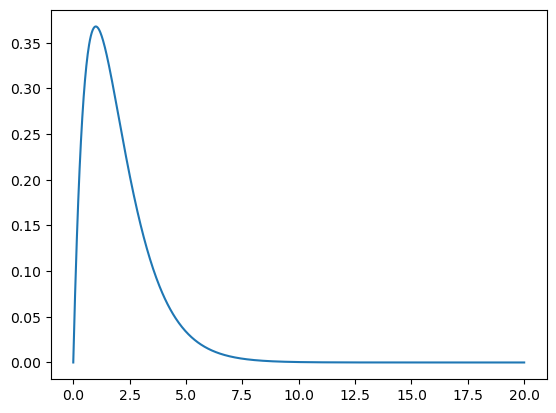

In [25]:
#plot van de probability density function
t = np.linspace(0, 20,1000)
y = t*np.exp(-t)
plt.plot(t,y)

## Binomiale verdeling

### Binomiaalverdeling

- Herhaald experiment
- Twee mogelijke uitkomsten
- Onafhankelijk
- Wat is de kans op $n$ successen?

Voorbeeld: We hebben een ongebalanceerde munt ($30\%$, kop $70\%$ munt). **Wat is de kans op $2\times$ kop in $3$ worpen?**

We noemen de kans op kop $\color{red}{p = 0.3}$. De kans op munt is dan $\color{skyblue}{1 - p = 1 - 0.3 = 0.7}$:

<img src="binom-tree.png" style="background: white; border: 20px solid white" width="600px" />

$$$$

Er zijn drie paden mogelijk voor de gewenste uitkomst:

- $\color{red}{0.3} \times \color{red}{0.3} \times \color{skyblue}{0.7}$
- $\color{red}{0.3} \times \color{skyblue}{0.7} \times \color{red}{0.3}$
- $\color{skyblue}{0.7} \times \color{red}{0.3} \times \color{red}{0.3}$

Oftewel $\color{green}{3} \times \color{red}{p} \times \color{red}{p} \times \color{skyblue}{(1-p)} $.

De $\color{green}{3}$ komt voort uit het aantmal mogelijke paden. Deze is te berekenen met het totaal aantal worpen (drie) en het aantal positieve resultaten waar we naar op zoek zijn (twee): $\begin{pmatrix} 3 \\ 2 \end{pmatrix} = 3$. Als we het totale aantal worpen $\color{darkcyan}{n}$ noemen en het aantal positieve resultaten dat we zoeken $\color{magenta}{k}$ dan krijgen we de volgende formule:

$P(X={\color{magenta} k}) = \begin{pmatrix} {\color{darkcyan} n} \\ { \color{magenta} k} \end{pmatrix} { \color{red} p}^{\color{magenta} k} { \color{skyblue} (1-p)}^{{\color{darkcyan} n}-{\color{magenta} k}}$

**Wat is de kans op $4\times$ kop in $10$ worpen?**

In [26]:
math.comb(10,4) * 0.3**4*0.7**6

0.2001209489999999

Simulatie:

In [27]:
sum(np.random.choice([1, 0], p = [0.3, 0.7], size=10))

3

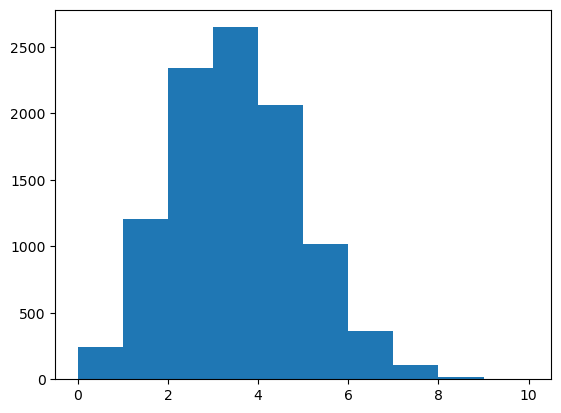

In [28]:
def experiment():
    return sum(np.random.choice([1, 0], p = [0.3, 0.7], size=10))
    
simulation = [experiment() for _ in range(10000)]

results = plt.hist(simulation, range(11))

In [29]:
results

(array([2.430e+02, 1.208e+03, 2.337e+03, 2.646e+03, 2.063e+03, 1.018e+03,
        3.630e+02, 1.070e+02, 1.400e+01, 1.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

In [30]:
results[0][4]/10000

0.2063

Exacte berekening:

In [31]:
import math
math.factorial(10)/(math.factorial(6)*math.factorial(4))*0.3**4*0.7**6

0.2001209489999999

Maak nu de opdrachten:
 - binomiale kansverdeling (met de hand en/of met een simulatie)
 - machine onderhoud 2
 - examenstress

## Machine onderhoud

Hieronder staat de uitwerking van de machine onderhoud opdracht. Maak deze eerst zelf voordat je de uitwerking bekijkt.

In [32]:
def simulate_30_days():
    days = 30
    probs = [0.02, 0.05, 0.01, 0.03, 0.06]

    broken_days_counter = 0

    for _ in range(days):
        broken = False
        for item in probs:
            broken = np.random.choice([True, False], p = [item, 1 - item])
            if broken:
                broken_days_counter +=1
                break
    return broken_days_counter

In [33]:
sample = [simulate_30_days() for _ in range(10000)]

(array([  59.,  323.,  794., 1537., 2007., 1851., 1534.,  945.,  550.,
         239.,  117.,   23.,   20.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]),
 <BarContainer object of 13 artists>)

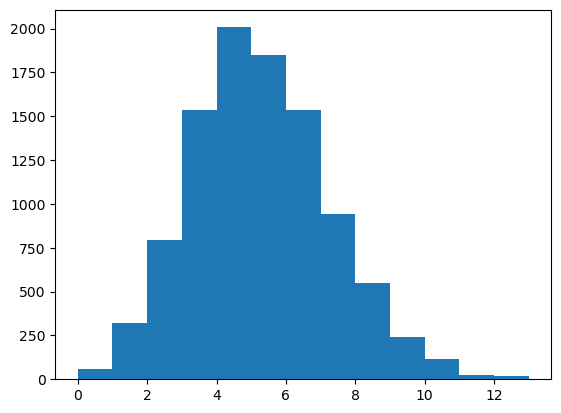

In [34]:
plt.hist(sample, range(0,14))

## Geometrische kansverdeling
<font color = "red"> Volgt in les 9! </font>

### Geometrische Verdeling

- Herhaald experiment
- Twee mogelijke uitkomsten
- Onafhankelijk
- Wat is de kans dat het eerste succes de $n^{de}$ poging is?

Voorbeeld: Je volgt een vak dat zo moeilijk is, dat het halen van het tentamen min of meer gewoon op kans berust. Ieder jaar dat je het vak probeert, heb je een $35\%$ kans het vak te halen. **Wat is het verwachte aantal jaren dat je dit vak zal proberen (ervan uitgaande dat je de handdoek niet in de ring gooit)?**

Wederom kunnen we dit kansproces in een boom visualiseren. Ieder pad dat op een $S$ (succes) komt eindigt, je gaat tenslotte niet herkansen na een voldoende. De boom heeft de vorm van een (mogelijk eindeloze) serie $F$-en (failures), met telkens een enkele afsplitsing voor succes die daarna doodloopt.
![geom_tree](geom-tree.png)

$$$$

De kans dat je het vak de eerste keer haalt is $p = 0.35$. De kans dat je twee keer nodig hebt is $0.65 \times 0.35$: een failure en een succes. De kans het vak de derde keer te halen is $0.65 \times 0.65 \times 0.35$, etc. Het patroon dat duidelijk wordt is als volgt:

$P(X={\color{magenta}k}) = \color{skyblue}{(1-p)}^{\color{magenta}{k}-1} \color{red}{p}$

In [35]:
def experiment(p):
    '''
    simuleert eenmaal een geometrische verdeling
    :param p: de kans op succes in één Bernoulli trial
    :return: de eerste keer succes
    '''
    count = 0
    while True:
        count += 1
        ran = np.random.random()
        if ran < p:
            return count

In [36]:
def simulation(n, p):
    result = np.zeros(n)
    for i in range(n):
        result[i] = experiment(p)
    return result

In [37]:
sample = simulation(1000, 0.35)
np.mean(sample)

2.896

Maak nu de opdracht verwachtingswaarde geometrische verdeling 